In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [ ]:
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [ ]:
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy: 1.0


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6623376623376623


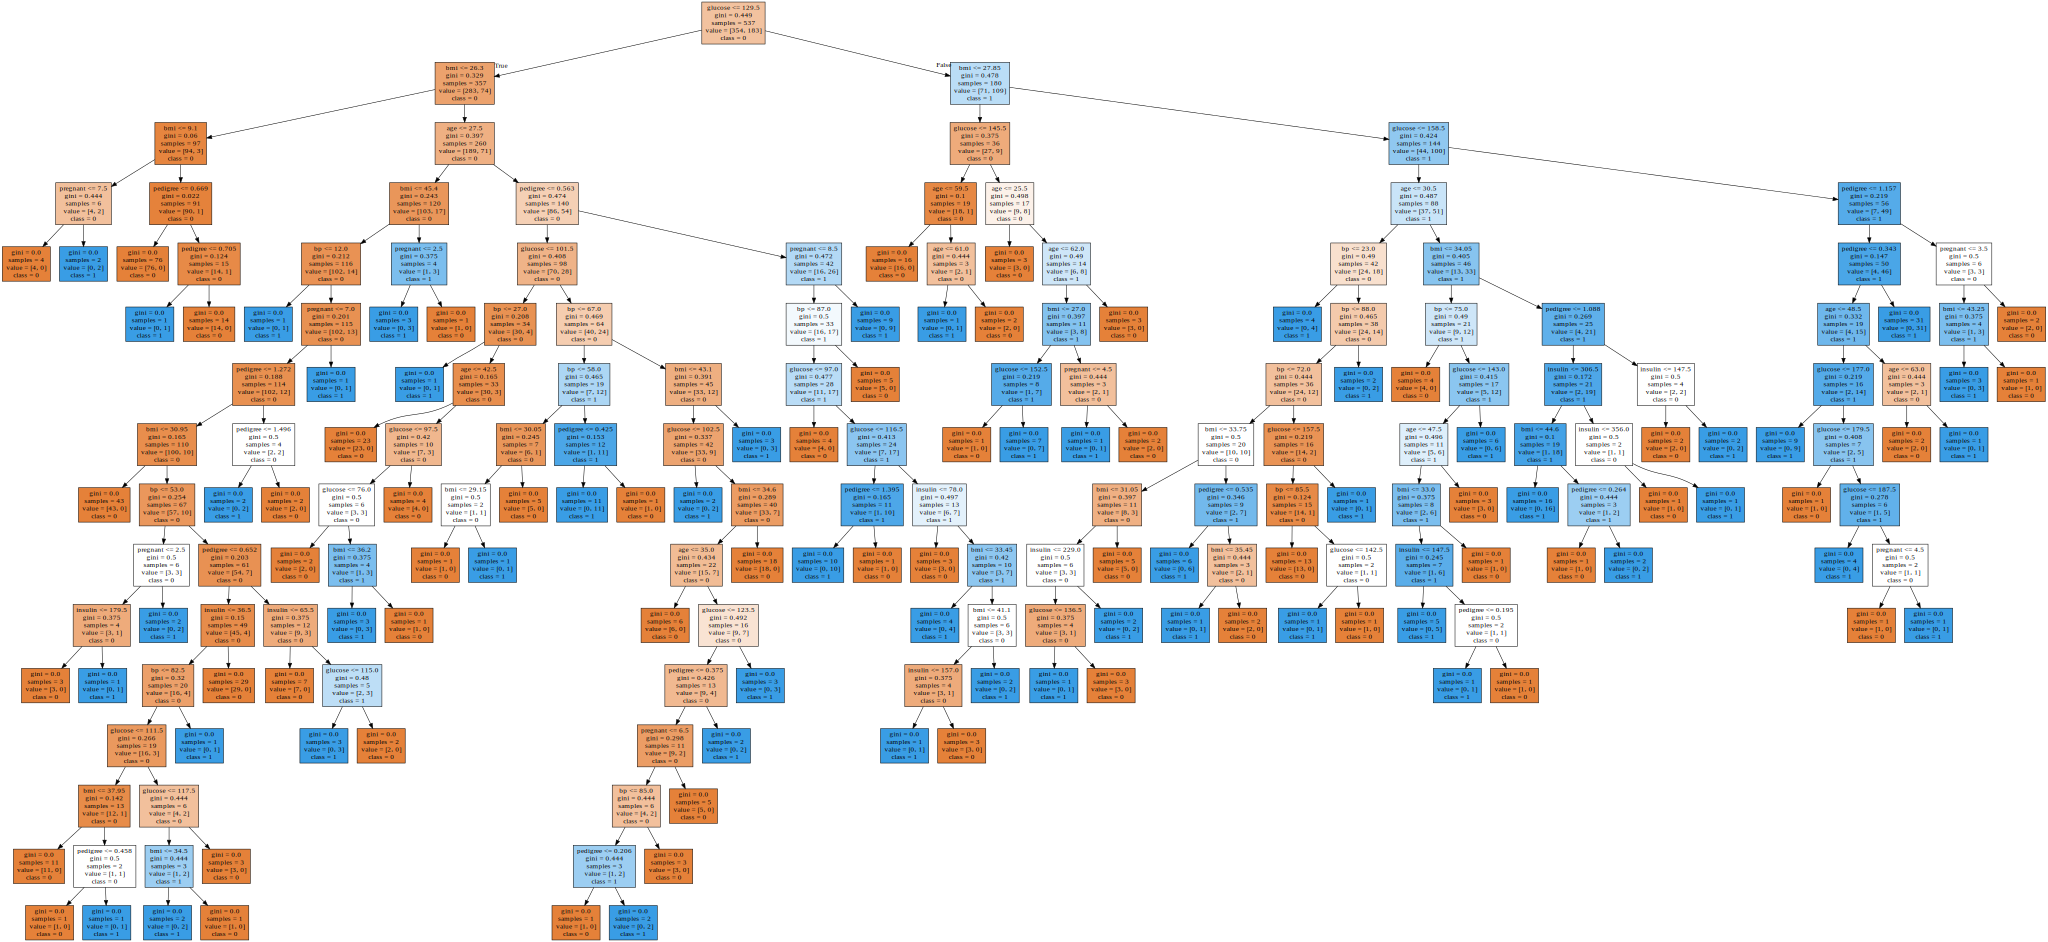

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=feature_cols,class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

[Text(135.19875000000002, 210.645, 'glucose <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]\nclass = 0'),
 Text(49.173750000000005, 197.055, 'bmi <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]\nclass = 0'),
 Text(14.88, 183.465, 'bmi <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]\nclass = 0'),
 Text(7.44, 169.875, 'pregnant <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = 0'),
 Text(3.72, 156.285, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = 0'),
 Text(11.16, 156.285, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(22.32, 169.875, 'pedigree <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]\nclass = 0'),
 Text(18.6, 156.285, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]\nclass = 0'),
 Text(26.040000000000003, 156.285, 'pedigree <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'),
 Text(22.32, 142.695, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(29.76, 142.695, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\n

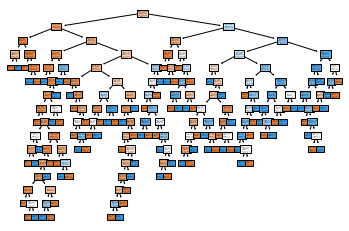

In [ ]:
from sklearn import tree
tree.plot_tree(clf,feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5)